In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LsiModel
from scipy.sparse import csr_matrix
import joblib

# # # Contoh penggunaan
data = pd.read_csv('Data_Pemilu.csv')
num_topics = 5  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True)

# Mengubah teks menjadi representasi vektor
X = vectorizer.fit_transform(data['content_clean'])

# Membuat sparse matrix menjadi format CSR
X_csr = csr_matrix(X)

# Membuat list dokumen Gensim corpus
corpus = []
for doc in X_csr:
    doc = [(idx, val) for idx, val in zip(doc.indices, doc.data)]
    corpus.append(doc)

# Membuat dictionary
id2word = {idx: word for idx, word in enumerate(vectorizer.get_feature_names_out())}

# Membuat model LSA dengan gensim
lsa_model = LsiModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Simpan model dan vectorizer menggunakan joblib
joblib.dump((vectorizer, lsa_model), 'lsa_tfidf_model_5topik.pkl')

['lsa_tfidf_model_5topik.pkl']

Topik 1: 0.263*"gibran" + 0.254*"prabowo" + 0.195*"ganjar" + 0.177*"cawapres" + 0.169*"presiden" + 0.156*"partai" + 0.152*"mahfud" + 0.149*"debat" + 0.142*"anies" + 0.140*"jokowi"
Topik 2: -0.429*"mk" + -0.285*"putusan" + -0.250*"hakim" + -0.219*"mkmk" + -0.219*"konstitusi" + -0.211*"anwar" + 0.161*"prabowo" + -0.151*"usman" + -0.150*"usia" + 0.139*"ganjar"
Topik 3: 0.407*"kpk" + 0.308*"firli" + -0.284*"gibran" + -0.208*"prabowo" + -0.177*"mk" + 0.158*"syahrul" + 0.158*"tersangka" + 0.136*"korupsi" + 0.128*"syl" + 0.128*"bahuri"
Topik 4: 0.390*"debat" + -0.253*"prabowo" + -0.244*"gibran" + 0.230*"anies" + -0.201*"jokowi" + 0.187*"kpu" + 0.173*"mahfud" + 0.172*"ganjar" + 0.168*"imin" + -0.164*"partai"
Topik 5: -0.290*"debat" + 0.267*"israel" + -0.240*"gibran" + -0.237*"kpk" + -0.227*"firli" + 0.204*"gaza" + 0.193*"jokowi" + 0.184*"palestina" + 0.177*"tni" + -0.135*"cawapres"


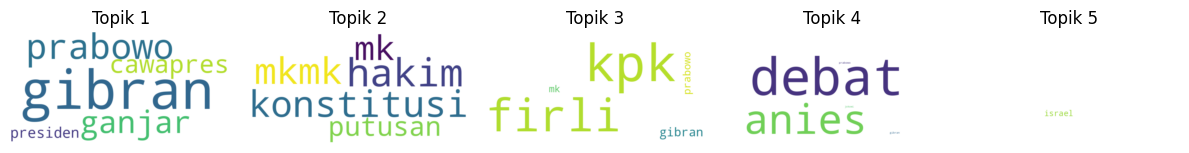

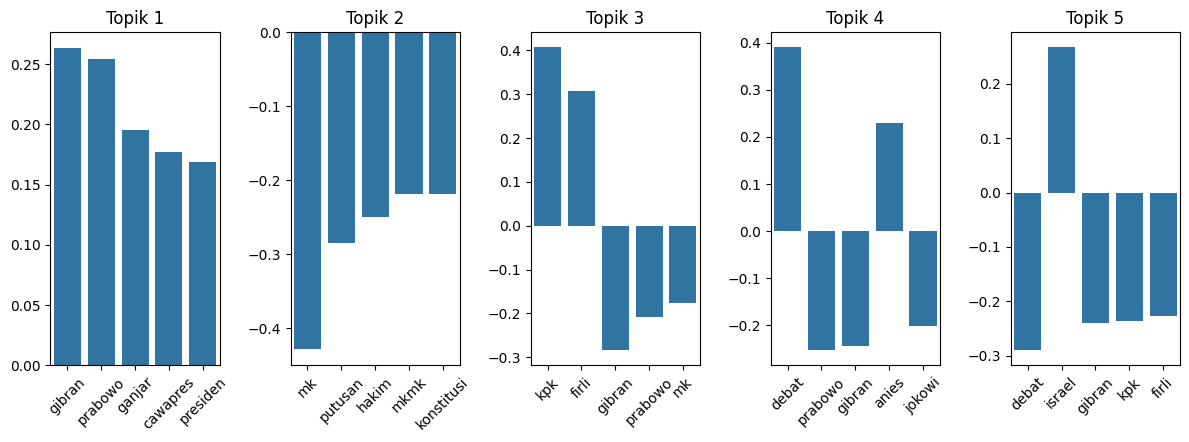

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

# Memuat kembali model dan vectorizer
vectorizer, lda_model = joblib.load('lsa_tfidf_model_5topik.pkl')

# Contoh penggunaan
data = pd.read_csv('Data_Pemilu.csv')
num_topics = 5  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

# Mendapatkan kata-kata kunci untuk setiap topik
for idx, topic in lda_model.print_topics():
    print(f"Topik {idx + 1}: {topic}")

plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lda_model.show_topic(i, topn=top_n_words)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    topic_words = [word for word, _ in lda_model.show_topic(i, topn=top_n_words)]
    word_probs = [prob for _, prob in lda_model.show_topic(i, topn=top_n_words)]
    sns.barplot(x=topic_words, y=word_probs)
    plt.title(f'Topik {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
